In [724]:
nr_cv = 5

# switch for using log values for SalePrice and features     
use_logvals = 1    

# target used for correlation 
target = 'SalePrice_log'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1


# Functions

def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values)
    plt.show()


In [725]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.max_column' , None)

In [726]:
data = pd.read_csv('AmesHousing.txt' , delimiter='\t')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,

In [727]:
df_train = data.iloc[0:1467]
df_test = data.iloc[1467:]

In [728]:
df_train = df_train.drop('PID' , axis=1)

In [729]:
df_train

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1128.0,1128.0,GasA,Ex,Y,SBrkr,1149,1141,0,2290,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2002.0,Unf,2.0,779.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,255900
1463,1464,60,RL,65.0,8158,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550.0,Unf,0.0,334.0,884.0,GasA,Ex,Y,SBrkr,884,884,0,1768,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,543.0,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,224900
1464,1465,60,RL,41.0,10905,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1129.0,1129.0,GasA,Ex,Y,SBrkr,1129,1198,0,2327,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2003.0,RFn,2.0,596.0,TA,TA,Y,0,57,0,0,0,0,NaN,NaN,NaN,

In [730]:
df_train.shape

(1467, 81)

In [731]:
df_test = df_test.drop(['PID' , 'SalePrice'] , axis=1)

In [732]:
df_test

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
1467,1468,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,PConc,Gd,TA,No,GLQ,642.0,Unf,0.0,273.0,915.0,GasA,Ex,Y,SBrkr,933,975,0,1908,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1994.0,Unf,2.0,493.0,TA,TA,Y,144,133,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1468,1469,120,RM,37.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,686.0,Unf,0.0,162.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2003.0,Fin,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal
1469,1470,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,662.0,Unf,0.0,186.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,3,Typ,0,NaN,Attchd,2004.0,RFn,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1470,1471,20,RL,75.0,13125,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,215.0,TA,TA,PConc,Gd,TA,Gd,GLQ,994.0,Unf,0.0,484.0,1478.0,GasA,Ex,Y,SBrkr,1493,0,0,1493,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1997.0,Fin,2.0,508.0,TA,TA,Y,140,39,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
1471,1472,90,RM,83.0,10126,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,Duplex,SFoyer,6,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,TA,Gd,GLQ,1593.0,LwQ,162.0,83.0,1838.0,GasA,Ex,Y,SBrkr,1838,0,0,1838,2.0,0.0,2,0,2,2,TA,8,Typ,0,NaN,Attchd,1998.0,Unf,3.0,721.0,TA,TA,Y,160,67,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,GasA,TA,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal
2926,2927,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,GasA,TA,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal
2927,2928,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2928,2929,20

In [733]:
df_train.describe()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1467.000000,1467.000000,1215.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1456.000000,1466.000000,1466.000000,1466.000000,1466.000000,1467.000000,1467.000000,1467.000000,1467.000000,1466.000000,1466.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1392.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.00000,1467.000000,1467.000000,1467.000000,1467.000000
mean,734.000000,56.775733,68.927572,9871.897751,6.115883,5.589639,1971.141104,1984.713020,102.660027,447.827422,51.283765,549.252387,1048.363574,1151.539877,337.036128,4.469666,1493.045671,0.448158,0.055935,1.567825,0.387185,2.844581,1.049761,6.415815,0.595774,1977.859914,1.770961,474.178596,92.202454,46.498978,22.062031,3.298569,16.200409,0.09816,47.446489,6.012952,2008.906612,179899.114519
std,423.630735,42.360430,22.656624,7136.466888,1.410422,1.154197,30.371279,20.808458,174.910315,444.582731,168.838356,430.212600,427.833255,373.154250,421.941759,47.207326,469.002381,0.530670,0.229874,0.545352,0.509178,0.829440,0.223710,1.553580,0.646796,25.014844,0.751099,212.155879,121.313038,64.464510,59.385389,29.811495,57.544153,3.75965,435.378926,2.653057,0.741577,78349.771112
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,372.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,2008.000000,12789.000000
25%,367.500000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,221.250000,788.250000,864.000000,0.000000,0.000000,1142.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.000000,2008.000000,129000.000000
50%,734.000000,50.000000,68.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,378.000000,0.000000,462.000000,991.000000,1086.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,2009.000000,160000.000000
75%,1100.500000,70.000000,80.000000,11411.500000,7.000000,6.000000,2000.000000,2003.000000,166.500000,732.750000,0.000000,784.000000,1306.000000,1382.000000,702.500000,0.000000,1735.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.00000,0.000000,7.000000,2009.000000,213750.000000
max,1467.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,2288.000000,1526.000000,2336.000000,3206.000000,2696.000000,1818.000000,1064.000000,3493.000000,3.000000,1.000000,4.000000,2.000000,6.000000,3.000000,13.000000,3.000000,2010.000000,5.000000,1488.000000,668.000000,547.000000,432.000000,508.000000,576.000000,144.00000,12500.000000,12.000000,2010.000000,615000.000000


In [734]:
df_test.describe()

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,1463.000000,1463.000000,1225.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1451.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1462.000000,1462.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1379.000000,1462.000000,1462.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,2199.000000,58.000684,69.519184,10424.700615,6.073821,5.536569,1971.572112,1983.818865,101.130944,437.421053,48.157895,569.293233,1054.872180,1167.597403,333.871497,4.884484,1506.353383,0.414501,0.066347,1.565277,0.371839,2.863978,1.038961,6.470267,0.602871,1978.407542,1.762654,471.456224,95.305537,48.570745,23.963773,1.884484,15.803144,4.394395,53.832536,6.419686,2006.671224
std,422.476035,42.920304,24.053280,8554.537534,1.411800,1.066783,30.127410,20.909665,183.289714,466.455022,169.541928,448.525205,453.184657,409.790088,434.909710,45.408659,539.720882,0.518522,0.259738,0.560630,0.496031,0.826184,0.203894,1.592230,0.649249,26.042738,0.770184,217.972668,131.252251,70.387497,68.582956,19.343632,54.606560,50.152077,672.677328,2.760667,0.646393
min,1468.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1833.500000,20.000000,58.000000,7403.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,216.000000,794.500000,894.000000,0.000000,0.000000,1103.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,313.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2006.000000
50%,2199.000000,50.000000,68.000000,9450.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,360.000000,0.000000,467.000000,988.000000,1083.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,477.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000
75%,2564.500000,70.000000,80.000000,11671.000000,7.000000,6.000000,2002.000000,2004.000000,160.500000,739.500000,0.000000,816.000000,1296.000000,1389.500000,704.000000,0.000000,1755.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2007.000000
max,2930.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2008.000000,2009.000000,1600.000000,5644.000000,1474.000000,2153.000000,6110.000000,5095.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,8.000000,2.000000,15.000000,4.000000,2207.000000,4.000000,1418.000000,1424.000000,742.000000,1012.000000,323.000000,440.000000,800.000000,17000.000000,12.000000,2008.000000


## Distribution of Target

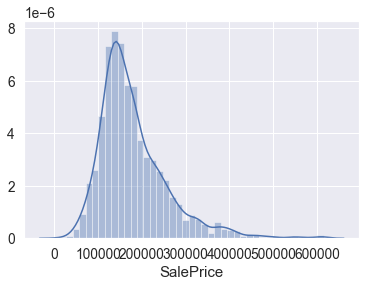

In [735]:
sns.distplot(df_train['SalePrice'])

In [736]:
print("Skewness : %f" % df_train['SalePrice'].skew()) # mode<median<mean : skew>0
print("Kurtosis : %f" % df_train['SalePrice'].kurt())

Skewness : 1.610788
Kurtosis : 4.119539


In [737]:
# Log transformation
df_train['SalePrice_log'] = np.log(df_train['SalePrice'])

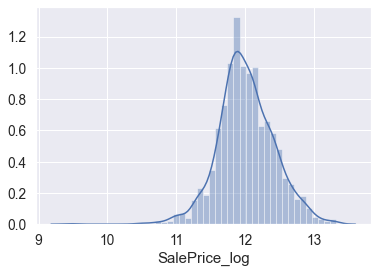

In [738]:
sns.distplot(df_train['SalePrice_log'])
df_train.drop('SalePrice' , axis=1  , inplace=True)

In [739]:
print("Skewness: %f" % df_train['SalePrice_log'].skew())
print("Kurtosis: %f" % df_train['SalePrice_log'].kurt())

Skewness: -0.079690
Kurtosis: 1.479802


## Numerical and categorical values

In [740]:
numerical_feats = df_train.dtypes[df_train.dtypes != 'object'].index
numerical_feats

Index(['Order', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice_log'],
      dtype='object')

In [741]:
categorical_feats = df_train.dtypes[df_train.dtypes == 'object'].index
categorical_feats

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [742]:
print('Numerical features :' , len(numerical_feats))
print('Categorical features : ' , len(categorical_feats))

Numerical features : 38
Categorical features :  43


In [743]:
df_train[numerical_feats]

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice_log
0,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,12.278393
1,2,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,11.561716
2,3,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,12.055250
3,4,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,12.404924
4,5,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,12.154253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,NaN,11250,8,5,2002,2002,0.0,0.0,0.0,1128.0,1128.0,1149,1141,0,2290,0.0,0.0,2,1,4,1,9,1,2002.0,2.0,779.0,0,0,0,0,0,0,0,5,2008,12.452542
1463,1464,60,65.0,8158,7,5,2003,2003,252.0,550.0,0.0,334.0,884.0,884,884,0,1768,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,543.0,0,63,0,0,0,0,0,7,2008,12.323411
1464,1465,60,41.0,10905,7,5,2003,2003,0.0,0.0,0.0,1129.0,1129.0,1129,1198,0,2327,0.0,0.0,2,1,4,1,9,1,2003.0,2.0,596.0,0,57,0,0,0,0,0,8,2008,12.388394
1465,1466,60,72.0,7226,7,5,2003,2003,0.0,0.0,0.0,798.0,798.0,798,842,0,1640,0.0,0.0,2,1,3,1,6,0,2003.0,2.0,595.0,0,45,0,0,0,0,0,6,2008,12.117241


In [744]:
df_train[categorical_feats]

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1463,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1464,RL,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1465,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## List of features with missing values

In [745]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False) # or divided by shape[0]

In [746]:
missing_values = pd.concat([total,percent] , axis=1 , keys=['Total','Percent'])
missing_values.head(10)

,Total,Percent
Pool QC,1466,0.999318
Misc Feature,1407,0.959100
Alley,1358,0.925699
Fence,1170,0.797546
Fireplace Qu,719,0.490116
Lot Frontage,252,0.171779
Garage Finish,75,0.051125
Garage Qual,75,0.051125
Garage Cond,75,0.051125
Garage Yr Blt,75,0.051125


### Filling missing values

In [622]:
# Nan mean None for some variables
cols_fillna = ['Pool QC','Misc Feature','Alley','Fence','Mas Vnr Type','Fireplace Qu',
               'Garage Qual','Garage Cond','Garage Finish','Garage Type', 'Electrical',
               'Kitchen Qual', 'Sale Type', 'Functional', 'Exterior 2nd', 'Exterior 1st',
               'Bsmt Exposure','Bsmt Cond','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2',
               'MS Zoning', 'Utilities']



In [623]:
#replace 'NaN' with 'None' in these columns

for col in cols_fillna:
    df_train[col].fillna('None' , inplace=True)
    df_test[col].fillna('None' , inplace=True)

In [624]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(10)

,Total,Percent
Lot Frontage,252,0.171779
Garage Yr Blt,75,0.051125
Mas Vnr Area,11,0.007498
Total Bsmt SF,1,0.000682
BsmtFin SF 2,1,0.000682
BsmtFin SF 1,1,0.000682
Bsmt Full Bath,1,0.000682
Bsmt Half Bath,1,0.000682
Bsmt Unf SF,1,0.000682
Land Contour,0,0.000000


In [625]:
df_train['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
1462      NaN
1463     65.0
1464     41.0
1465     72.0
1466     96.0
Name: Lot Frontage, Length: 1467, dtype: float64

In [626]:
df_train.fillna(df_train.mean(), inplace=True) #transform NaN values by mean of columns
df_test.fillna(df_test.mean(), inplace=True)

In [627]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(5)

,Total,Percent
SalePrice_log,0,0.0
Heating,0,0.0
Roof Style,0,0.0
Roof Matl,0,0.0
Exterior 1st,0,0.0


### Log transform
Like the target variable, also some of the feature values are not normally distributed and it is therefore better to use log values in df_train and df_test. Checking for skewness and kurtosis:

In [628]:
for col in numerical_feats:
    print('{:20}'.format(col), 
          'Skewness: {:05.2f}'.format(df_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df_train[col].kurt())  
         )

Order                Skewness: 00.00     Kurtosis: -01.20
MS SubClass          Skewness: 01.37     Kurtosis: 001.41
Lot Frontage         Skewness: 01.46     Kurtosis: 014.67
Lot Area             Skewness: 17.22     Kurtosis: 472.13
Overall Qual         Skewness: 00.18     Kurtosis: 000.08
Overall Cond         Skewness: 00.46     Kurtosis: 001.60
Year Built           Skewness: -0.64     Kurtosis: -00.39
Year Remod/Add       Skewness: -0.48     Kurtosis: -01.32
Mas Vnr Area         Skewness: 02.35     Kurtosis: 007.02
BsmtFin SF 1         Skewness: 00.87     Kurtosis: 000.38
BsmtFin SF 2         Skewness: 03.97     Kurtosis: 017.21
Bsmt Unf SF          Skewness: 00.98     Kurtosis: 000.56
Total Bsmt SF        Skewness: 00.45     Kurtosis: 001.41
1st Flr SF           Skewness: 00.80     Kurtosis: 000.62
2nd Flr SF           Skewness: 00.80     Kurtosis: -00.61
Low Qual Fin SF      Skewness: 13.91     Kurtosis: 236.93
Gr Liv Area          Skewness: 00.74     Kurtosis: 000.68
Bsmt Full Bath

Skewness: 0.743186
Kurtosis: 0.675176


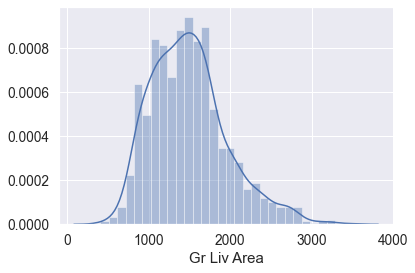

In [629]:
sns.distplot(df_train['Gr Liv Area']);
#skewness and kurtosis
print("Skewness: %f" % df_train['Gr Liv Area'].skew())
print("Kurtosis: %f" % df_train['Gr Liv Area'].kurt())


Skewness: 17.218476
Kurtosis: 472.131397


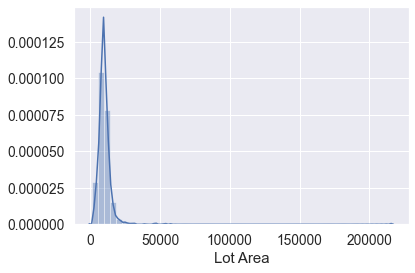

In [630]:
sns.distplot(df_train['Lot Area']);
#skewness and kurtosis
print("Skewness: %f" % df_train['Lot Area'].skew())
print("Kurtosis: %f" % df_train['Lot Area'].kurt())

In [631]:
df_train

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice_log
0,1,20,RL,141.000000,31770,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,12.278393
1,2,20,RH,80.000000,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,11.561716
2,3,20,RL,81.000000,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,12.055250
3,4,20,RL,93.000000,11160,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.404924
4,5,60,RL,74.000000,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,12.154253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,RL,68.927572,11250,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1128.0,1128.0,GasA,Ex,Y,SBrkr,1149,1141,0,2290,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2002.0,Unf,2.0,779.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,12.452542
1463,1464,60,RL,65.000000,8158,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550.0,Unf,0.0,334.0,884.0,GasA,Ex,Y,SBrkr,884,884,0,1768,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,543.0,TA,TA,Y,0,63,0,0,0,0,None,None,None,0,7,2008,WD,Normal,12.323411
1464,1465,60,RL,41.000000,10905,Pave,None,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1129.0,1129.0,GasA,Ex,Y,SBrkr,1129,1198,0,23

In [632]:
df_train['Gr Liv Area']

0       1656
1        896
2       1329
3       2110
4       1629
        ... 
1462    2290
1463    1768
1464    2327
1465    1640
1466    1764
Name: Gr Liv Area, Length: 1467, dtype: int64

In [633]:
# delete GrlivArea & LotArea and replace by their log
for df in [df_train, df_test]:
    df['GrLivArea_Log'] = np.log(df['Gr Liv Area'])
    df.drop('Gr Liv Area', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['Lot Area'])
    df.drop('Lot Area', inplace= True, axis = 1)
    
    
    
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [634]:
df_train

,Order,MS SubClass,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice_log,GrLivArea_Log,LotArea_Log
0,1,20,RL,141.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,12.278393,7.412160,10.366278
1,2,20,RH,80.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,11.561716,6.797940,9.360655
2,3,20,RL,81.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,12.055250,7.192182,9.565704
3,4,20,RL,93.000000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.404924,7.654443,9.320091
4,5,60,RL,74.000000,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,12.154253,7.395722,9.534595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,RL,68.927572,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1128.0,1128.0,GasA,Ex,Y,SBrkr,1149,1141,0,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2002.0,Unf,2.0,779.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,12.452542,7.736307,9.328123
1463,1464,60,RL,65.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550.0,Unf,0.0,334.0,884.0,GasA,Ex,Y,SBrkr,884,884,0,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,543.0,TA,TA,Y,0,63,0,0,0,0,None,None,None,0,7,2008,WD,Normal,12.323411,7.477604,9.006754
1464,1465,60,RL,41.000000,Pave,None,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,U

Skewness: -0.152177
Kurtosis: -0.010717


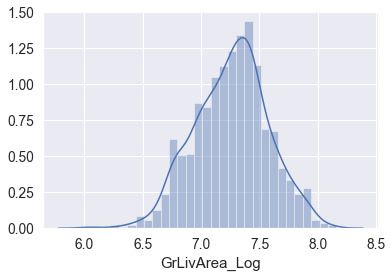

In [635]:
sns.distplot(df_train['GrLivArea_Log']);
#skewness and kurtosis
print("Skewness: %f" % df_train['GrLivArea_Log'].skew())
print("Kurtosis: %f" % df_train['GrLivArea_Log'].kurt())

Skewness: -0.798724
Kurtosis: 3.789373


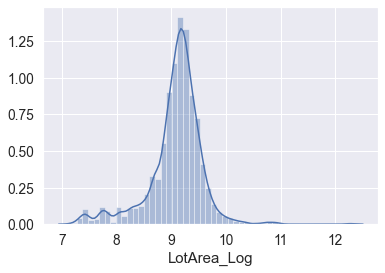

In [636]:
sns.distplot(df_train['LotArea_Log']);
#skewness and kurtosis
print("Skewness: %f" % df_train['LotArea_Log'].skew())
print("Kurtosis: %f" % df_train['LotArea_Log'].kurt())


## Relation of features to target (SalePrice_log)

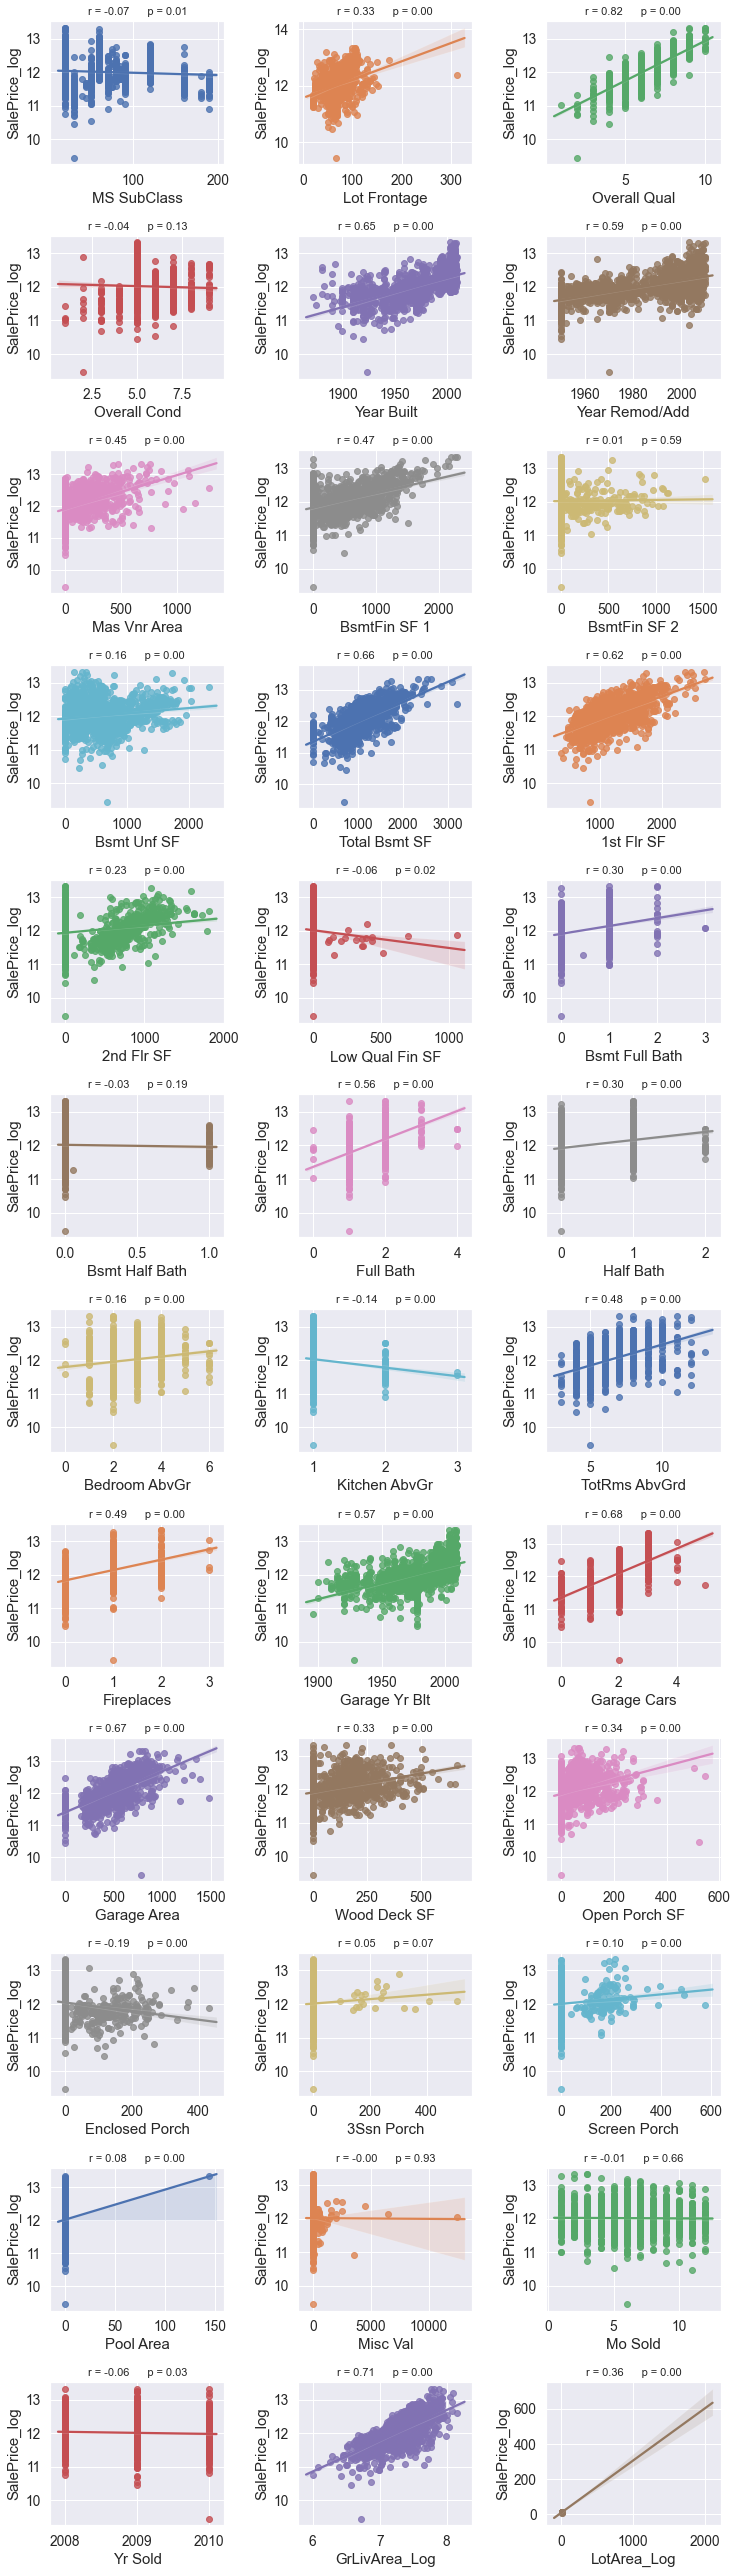

In [637]:
nr_rows = 12
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feats)
li_not_plot = ['Order','SalePrice_log']
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(df_train[li_plot_num_feats[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[li_plot_num_feats[i]], df_train[target])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

We see that for some features like 'OverallQual' there is a strong linear correlation (0.79) to the target.
For other features like 'MSSubClass' the correlation is very weak.
For this kernel I decided to use only those features for prediction that have a correlation larger than a threshold value to SalePrice.
This threshold value can be choosen in the global settings : min_val_corr

With the default threshold for min_val_corr = 0.4, these features are dropped in Part 2, Data Wrangling:
'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'

We also see that the entries for some of the numerical columns are in fact categorical values.
For example, the numbers for 'OverallQual' and 'MSSubClass' represent a certain group for that feature ( see data description txt)

### Outliers

In [638]:
df_train = df_train.drop(
    df_train[(df_train['Overall Qual']==10) & (df_train['SalePrice_log']<12.3)].index)

In [639]:
df_train = df_train.drop(
    df_train[(df_train['GrLivArea_Log']>8.3) & (df_train['SalePrice_log']<12.5)].index)

In [640]:
df_train

,Order,MS SubClass,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice_log,GrLivArea_Log,LotArea_Log
0,1,20,RL,141.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,12.278393,7.412160,10.366278
1,2,20,RH,80.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,11.561716,6.797940,9.360655
2,3,20,RL,81.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,12.055250,7.192182,9.565704
3,4,20,RL,93.000000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.404924,7.654443,9.320091
4,5,60,RL,74.000000,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,12.154253,7.395722,9.534595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,RL,68.927572,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1128.0,1128.0,GasA,Ex,Y,SBrkr,1149,1141,0,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2002.0,Unf,2.0,779.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,12.452542,7.736307,9.328123
1463,1464,60,RL,65.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550.0,Unf,0.0,334.0,884.0,GasA,Ex,Y,SBrkr,884,884,0,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,543.0,TA,TA,Y,0,63,0,0,0,0,None,None,None,0,7,2008,WD,Normal,12.323411,7.477604,9.006754
1464,1465,60,RL,41.000000,Pave,None,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,U

### Find columns with strong correlation to target
Only those with r > min_val_corr are used in the ML Regressors in Part 3
The value for min_val_corr can be chosen in global settings

In [641]:
corr = df_train.corr()
corr

,Order,MS SubClass,Lot Frontage,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice_log,GrLivArea_Log,LotArea_Log
Order,1.000000,-0.023452,-0.015747,-0.039223,0.073713,-0.116785,-0.059252,-0.032049,-0.056862,0.006186,-0.019911,-0.076669,-0.059965,0.019750,0.015525,-0.041446,0.029423,-0.067732,-0.049668,0.019106,0.003282,-0.023981,-0.053666,-0.099670,-0.051938,-0.044387,-0.065617,0.035548,0.009871,0.005762,0.023569,0.020352,-0.021204,0.236217,-0.930091,-0.050402,-0.030613,0.038000
MS SubClass,-0.023452,1.000000,-0.435766,0.053867,-0.099629,0.031188,0.050090,0.003755,-0.081520,-0.093830,-0.120812,-0.243224,-0.273799,0.341453,-0.001050,-0.025442,-0.005793,0.167741,0.223161,-0.023979,0.299110,0.054332,-0.064532,0.095414,-0.047667,-0.110338,-0.035456,0.000722,0.009877,-0.051724,-0.065846,-0.022682,-0.023684,-0.007913,0.000505,-0.071594,0.101400,-0.531120
Lot Frontage,-0.015747,-0.435766,1.000000,0.175739,-0.053042,0.106858,0.079305,0.202347,0.191699,0.029647,0.107332,0.318833,0.413582,-0.038223,-0.008341,0.121477,-0.035527,0.129318,-0.000700,0.219650,-0.004606,0.301292,0.217401,0.066578,0.263076,0.295893,0.075575,0.100665,-0.004803,0.047726,0.042493,0.046978,0.017344,0.001787,0.003498,0.327450,0.286985,0.626998
Overall Qual,-0.039223,0.053867,0.175739,1.000000,-0.086000,0.606755,0.567314,0.431354,0.324036,-0.046345,0.233195,0.552924,0.488356,0.203395,-0.070616,0.186818,-0.060236,0.506796,0.263273,0.048059,-0.176106,0.361208,0.386370,0.557109,0.610378,0.582854,0.259092,0.319180,-0.174351,0.032028,0.021574,0.071949,-0.010197,-0.003683,-0.078341,0.823850,0.585581,0.135905
Overall Cond,0.073713,-0.099629,-0.053042,-0.086000,1.000000,-0.356511,0.082344,-0.147044,-0.037234,0.047737,-0.118501,-0.139013,-0.154475,-0.012308,-0.015565,-0.046524,0.099604,-0.224509,-0.117131,0.001024,-0.095220,-0.117805,-0.056966,-0.304572,-0.157276,-0.134031,0.045598,-0.013858,0.053624,0.034172,0.065234,-0.013347,0.047590,0.017998,-0.032053,-0.039640,-0.148386,0.000158
Year Built,-0.116785,0.031188,0.106858,0.606755,-0.356511,1.000000,0.578552,0.332943,0.316378,-0.023204,0.095677,0.415815,0.327667,0.018618,-0.146972,0.231546,-0.038506,0.470296,0.297733,-0.046976,-0.154741,0.120741,0.205245,0.798529,0.546090,0.508852,0.247333,0.190880,-0.404893,0.039099,-0.035524,0.027406,-0.029046,-0.021322,-0.007895,0.646107,0.289259,0.046933
Year Remod/Add,-0.059252,0.050090,0.079305,0.567314,0.082344,0.578552,1.000000,0.203927,0.174167,-0.040993,0.122386,0.287875,0.244349,0.141424,-0.074374,0.157575,-0.052413,0.432137,0.204602,-0.025351,-0.149620,0.190707,0.145855,0.613423,0.415564,0.383996,0.237116,0.262208,-0.228901,0.024307,-0.049480,0.022961,-0.021276,-0.019776,-0.014204,0.591388,0.333511,0.055704
Mas Vnr Area,-0.032049,0.003755,0.202347,0.431354,-0.147044,0.332943,0.203927,1.000000,0.306712,-0.039513,0.100575,0.404260,0.397920,0.085962,-0.055819,0.163885,-0.024273,0.238869,0.195520,0.073210,-0.056366,0.282023,0.263158,0.269205,0.370265,0.390561,0.129187,0.152160,-0.111210,0.027522,0.049818,0.086563,-0.013590,0.012462,-0.062368,0.454229,0.367730,0.106825
BsmtFin SF 1,-0.056862,-0.081520,0.191699,0.324036,-0.037234,0.316378,0.174167,0.306712,1.000000,-0.060156,-0.485438,0.527272,0.450273,-0.180955,-0.071232,0.648551,0.038025,0.071400,0.016724,-0.136223,-0.113529,0.038615,0.323909,0.224272,0.280372,0.313287,0.211791,0.098853,-0.109224,0.070448,0.106599,0.106355,0.029361,-0.018078,0.010852,0.471483,0.181181,0.200023
BsmtFin SF 2,0.006186,-0.093830,0.029647,-0.046345,0.047737,-0.023204,-0.040993,-0.039513,-0.060156,1.000000,-0.230436,0.100408,0.077357,-0.124975,-0.005684,0.164898,0.099171,-0.087947,-0.038466,-0.032079,-0.064

In [642]:
corr_abs = corr.abs()
corr_abs

,Order,MS SubClass,Lot Frontage,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice_log,GrLivArea_Log,LotArea_Log
Order,1.000000,0.023452,0.015747,0.039223,0.073713,0.116785,0.059252,0.032049,0.056862,0.006186,0.019911,0.076669,0.059965,0.019750,0.015525,0.041446,0.029423,0.067732,0.049668,0.019106,0.003282,0.023981,0.053666,0.099670,0.051938,0.044387,0.065617,0.035548,0.009871,0.005762,0.023569,0.020352,0.021204,0.236217,0.930091,0.050402,0.030613,0.038000
MS SubClass,0.023452,1.000000,0.435766,0.053867,0.099629,0.031188,0.050090,0.003755,0.081520,0.093830,0.120812,0.243224,0.273799,0.341453,0.001050,0.025442,0.005793,0.167741,0.223161,0.023979,0.299110,0.054332,0.064532,0.095414,0.047667,0.110338,0.035456,0.000722,0.009877,0.051724,0.065846,0.022682,0.023684,0.007913,0.000505,0.071594,0.101400,0.531120
Lot Frontage,0.015747,0.435766,1.000000,0.175739,0.053042,0.106858,0.079305,0.202347,0.191699,0.029647,0.107332,0.318833,0.413582,0.038223,0.008341,0.121477,0.035527,0.129318,0.000700,0.219650,0.004606,0.301292,0.217401,0.066578,0.263076,0.295893,0.075575,0.100665,0.004803,0.047726,0.042493,0.046978,0.017344,0.001787,0.003498,0.327450,0.286985,0.626998
Overall Qual,0.039223,0.053867,0.175739,1.000000,0.086000,0.606755,0.567314,0.431354,0.324036,0.046345,0.233195,0.552924,0.488356,0.203395,0.070616,0.186818,0.060236,0.506796,0.263273,0.048059,0.176106,0.361208,0.386370,0.557109,0.610378,0.582854,0.259092,0.319180,0.174351,0.032028,0.021574,0.071949,0.010197,0.003683,0.078341,0.823850,0.585581,0.135905
Overall Cond,0.073713,0.099629,0.053042,0.086000,1.000000,0.356511,0.082344,0.147044,0.037234,0.047737,0.118501,0.139013,0.154475,0.012308,0.015565,0.046524,0.099604,0.224509,0.117131,0.001024,0.095220,0.117805,0.056966,0.304572,0.157276,0.134031,0.045598,0.013858,0.053624,0.034172,0.065234,0.013347,0.047590,0.017998,0.032053,0.039640,0.148386,0.000158
Year Built,0.116785,0.031188,0.106858,0.606755,0.356511,1.000000,0.578552,0.332943,0.316378,0.023204,0.095677,0.415815,0.327667,0.018618,0.146972,0.231546,0.038506,0.470296,0.297733,0.046976,0.154741,0.120741,0.205245,0.798529,0.546090,0.508852,0.247333,0.190880,0.404893,0.039099,0.035524,0.027406,0.029046,0.021322,0.007895,0.646107,0.289259,0.046933
Year Remod/Add,0.059252,0.050090,0.079305,0.567314,0.082344,0.578552,1.000000,0.203927,0.174167,0.040993,0.122386,0.287875,0.244349,0.141424,0.074374,0.157575,0.052413,0.432137,0.204602,0.025351,0.149620,0.190707,0.145855,0.613423,0.415564,0.383996,0.237116,0.262208,0.228901,0.024307,0.049480,0.022961,0.021276,0.019776,0.014204,0.591388,0.333511,0.055704
Mas Vnr Area,0.032049,0.003755,0.202347,0.431354,0.147044,0.332943,0.203927,1.000000,0.306712,0.039513,0.100575,0.404260,0.397920,0.085962,0.055819,0.163885,0.024273,0.238869,0.195520,0.073210,0.056366,0.282023,0.263158,0.269205,0.370265,0.390561,0.129187,0.152160,0.111210,0.027522,0.049818,0.086563,0.013590,0.012462,0.062368,0.454229,0.367730,0.106825
BsmtFin SF 1,0.056862,0.081520,0.191699,0.324036,0.037234,0.316378,0.174167,0.306712,1.000000,0.060156,0.485438,0.527272,0.450273,0.180955,0.071232,0.648551,0.038025,0.071400,0.016724,0.136223,0.113529,0.038615,0.323909,0.224272,0.280372,0.313287,0.211791,0.098853,0.109224,0.070448,0.106599,0.106355,0.029361,0.018078,0.010852,0.471483,0.181181,0.200023
BsmtFin SF 2,0.006186,0.093830,0.029647,0.046345,0.047737,0.023204,0.040993,0.039513,0.060156,1.000000,0.230436,0.100408,0.077357,0.124975,0.005684,0.164898,0.099171,0.087947,0.038466,0.032079,0.064363,0.076728,0.052481,0.059146,0.007387,0.012105,0.082460,0.022043,0.014297,0.025182,0.047143,0.007938,0.016380,0.000722,0.006963,0.014080,0.04708

In [643]:
nr_num_cols = len(numerical_feats) #number columns numerical
nr_num_cols

38

In [644]:
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target] # corr target with numerical columns
ser_corr

SalePrice_log      1.000000
Overall Qual       0.823850
GrLivArea_Log      0.707638
Garage Cars        0.684372
Garage Area        0.665509
Total Bsmt SF      0.660441
Year Built         0.646107
1st Flr SF         0.624174
Year Remod/Add     0.591388
Garage Yr Blt      0.569080
Full Bath          0.556455
Fireplaces         0.490529
TotRms AbvGrd      0.475211
BsmtFin SF 1       0.471483
Mas Vnr Area       0.454229
LotArea_Log        0.358994
Open Porch SF      0.337432
Wood Deck SF       0.331080
Lot Frontage       0.327450
Bsmt Full Bath     0.304518
Half Bath          0.300334
2nd Flr SF         0.227024
Enclosed Porch     0.186641
Bsmt Unf SF        0.164031
Bedroom AbvGr      0.158596
Kitchen AbvGr      0.139321
Screen Porch       0.100225
Pool Area          0.084080
MS SubClass        0.071594
Low Qual Fin SF    0.061123
Yr Sold            0.056140
Order              0.050402
3Ssn Porch         0.048160
Overall Cond       0.039640
Bsmt Half Bath     0.034162
BsmtFin SF 2       0

In [645]:
cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index) # columns above correlation limit 
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index) # columns below correlation limit

print(cols_abv_corr_limit)
print("*"*100)
print(cols_bel_corr_limit)

type(cols_bel_corr_limit)

['SalePrice_log', 'Overall Qual', 'GrLivArea_Log', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Year Built', '1st Flr SF', 'Year Remod/Add', 'Garage Yr Blt', 'Full Bath', 'Fireplaces', 'TotRms AbvGrd', 'BsmtFin SF 1', 'Mas Vnr Area']
****************************************************************************************************
['LotArea_Log', 'Open Porch SF', 'Wood Deck SF', 'Lot Frontage', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF', 'Enclosed Porch', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Screen Porch', 'Pool Area', 'MS SubClass', 'Low Qual Fin SF', 'Yr Sold', 'Order', '3Ssn Porch', 'Overall Cond', 'Bsmt Half Bath', 'BsmtFin SF 2', 'Mo Sold', 'Misc Val']


list

## Relation to SalePrice for all categorical features

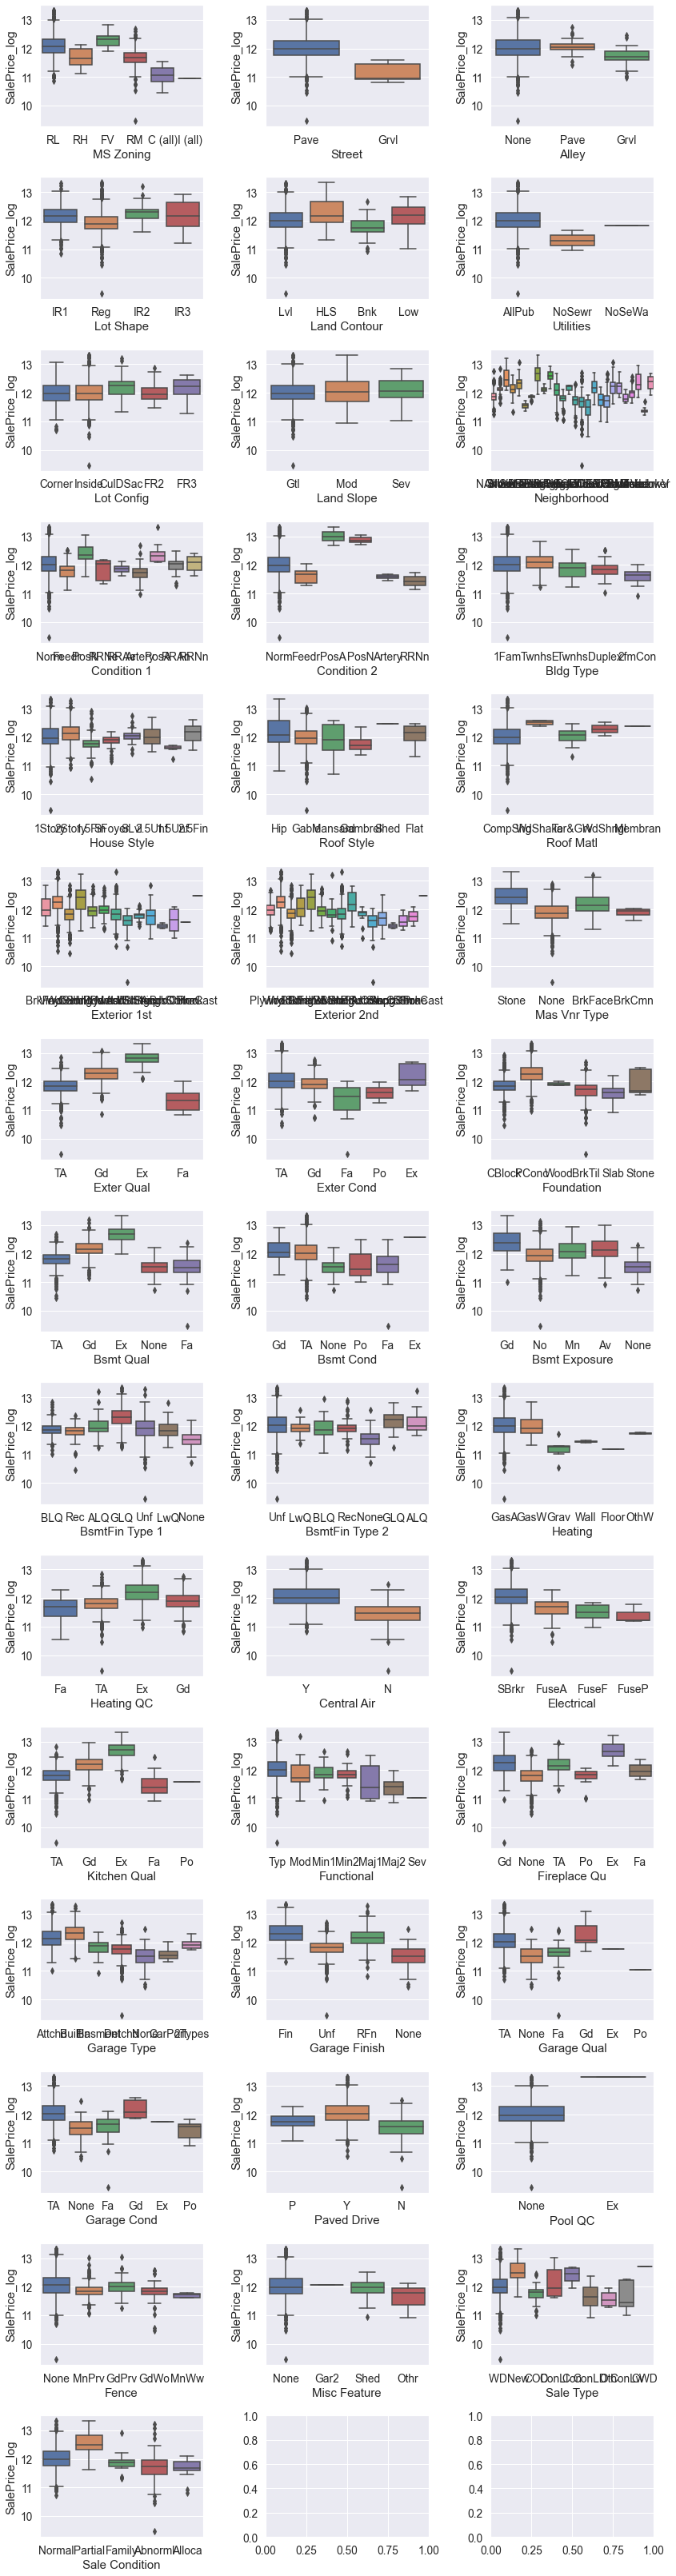

In [646]:
# we can use boxplot for categorical variable compared with continuous target variable

li_cat_feats = list(categorical_feats)
nr_rows = 15
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=df_train, ax = axs[r][c])
    
plt.tight_layout()    
plt.show()   

Conclusion from EDA on categorical columns:

For many of the categorical there is no strong relation to the target.
However, for some fetaures it is easy to find a strong relation.
From the figures above these are : 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType' Also for the categorical features, I use only those that show a strong relation to SalePrice. So the other columns are dropped when creating the ML dataframes in Part 2 :
'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'

In [647]:
catg_strong_corr = [ 'MS Zoning', 'Neighborhood', 'Condition 2', 'Mas Vnr Type', 'Exter Qual', 
                     'Bsmt Qual','Central Air', 'Electrical', 'Kitchen Qual', 'Sale Type']



In [648]:
catg_weak_corr = list(categorical_feats.drop([ 'MS Zoning', 'Neighborhood', 'Condition 2', 'Mas Vnr Type', 'Exter Qual', 
                     'Bsmt Qual','Central Air', 'Electrical', 'Kitchen Qual', 'Sale Type']))

In [649]:
type(catg_weak_corr)

list

## Correlation matrix 1
Features with largest correlation to SalePrice_Log 

all numerical features with correlation coefficient above threshold

In [650]:
nr_feats = len(cols_abv_corr_limit) # number of features select after apply threshold=0.4
nr_feats

15

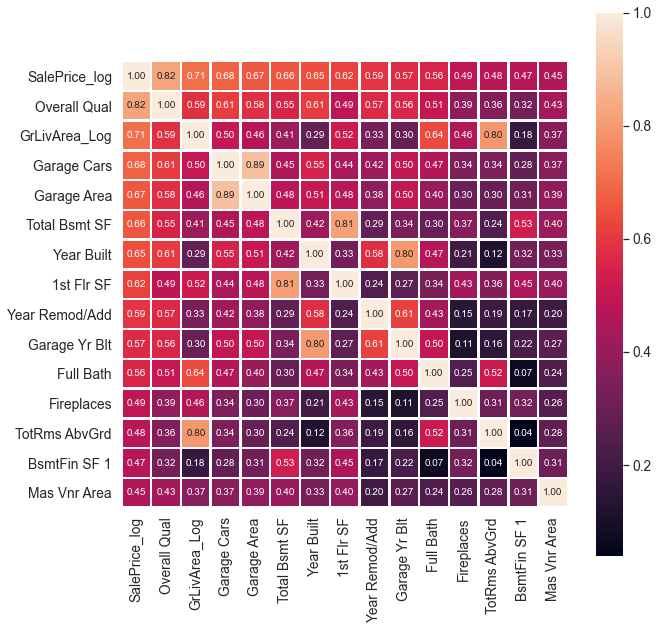

In [651]:
plot_corr_matrix(df_train , nr_feats , target)

# Part 2: Data wrangling
Drop all columns with only small correlation to SalePrice

Transform Categorical to numerical

Handling columns with missing data

Log values
Drop all columns with strong correlation to similar features


Numerical columns : drop similar and low correlation


Categorical columns : Transform to numerical

In [652]:
to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drops = ['Order'] + to_drop_num + to_drop_catg

In [653]:
df_train

,Order,MS SubClass,MS Zoning,Lot Frontage,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice_log,GrLivArea_Log,LotArea_Log
0,1,20,RL,141.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,None,None,None,0,5,2010,WD,Normal,12.278393,7.412160,10.366278
1,2,20,RH,80.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,11.561716,6.797940,9.360655
2,3,20,RL,81.000000,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,12.055250,7.192182,9.565704
3,4,20,RL,93.000000,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal,12.404924,7.654443,9.320091
4,5,60,RL,74.000000,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,12.154253,7.395722,9.534595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,1463,60,RL,68.927572,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1128.0,1128.0,GasA,Ex,Y,SBrkr,1149,1141,0,0.0,0.0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,2002.0,Unf,2.0,779.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,5,2008,WD,Normal,12.452542,7.736307,9.328123
1463,1464,60,RL,65.000000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550.0,Unf,0.0,334.0,884.0,GasA,Ex,Y,SBrkr,884,884,0,1.0,0.0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2.0,543.0,TA,TA,Y,0,63,0,0,0,0,None,None,None,0,7,2008,WD,Normal,12.323411,7.477604,9.006754
1464,1465,60,RL,41.000000,Pave,None,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,U

In [654]:
for df in [df_train, df_test]: # delete all colums in train and test set
    df.drop(cols_to_drop, inplace= True, axis = 1)

In [655]:
df_train

,MS Zoning,Neighborhood,Condition 2,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,Central Air,Electrical,1st Flr SF,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Sale Type,SalePrice_log,GrLivArea_Log
0,RL,NAmes,Norm,6,1960,1960,Stone,112.0,TA,TA,639.0,1080.0,Y,SBrkr,1656,1,TA,7,2,1960.0,2.0,528.0,WD,12.278393,7.412160
1,RH,NAmes,Norm,5,1961,1961,None,0.0,TA,TA,468.0,882.0,Y,SBrkr,896,1,TA,5,0,1961.0,1.0,730.0,WD,11.561716,6.797940
2,RL,NAmes,Norm,6,1958,1958,BrkFace,108.0,TA,TA,923.0,1329.0,Y,SBrkr,1329,1,Gd,6,0,1958.0,1.0,312.0,WD,12.055250,7.192182
3,RL,NAmes,Norm,7,1968,1968,None,0.0,Gd,TA,1065.0,2110.0,Y,SBrkr,2110,2,Ex,8,2,1968.0,2.0,522.0,WD,12.404924,7.654443
4,RL,Gilbert,Norm,5,1997,1998,None,0.0,TA,Gd,791.0,928.0,Y,SBrkr,928,2,TA,6,1,1997.0,2.0,482.0,WD,12.154253,7.395722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,RL,CollgCr,Norm,8,2002,2002,None,0.0,Gd,Gd,0.0,1128.0,Y,SBrkr,1149,2,Gd,9,1,2002.0,2.0,779.0,WD,12.452542,7.736307
1463,RL,CollgCr,Norm,7,2003,2003,BrkFace,252.0,Gd,Gd,550.0,884.0,Y,SBrkr,884,2,Gd,8,0,2003.0,2.0,543.0,WD,12.323411,7.477604
1464,RL,CollgCr,Norm,7,2003,2003,None,0.0,Gd,Gd,0.0,1129.0,Y,SBrkr,1129,2,Gd,9,1,2003.0,2.0,596.0,WD,12.388394,7.752335
1465,RL,CollgCr,Norm,7,2003,2003,None,0.0,Gd,Gd,0.0,798.0,Y,SBrkr,798,2,Gd,6,0,2003.0,2.0,595.0,WD,12.117241,7.402452


## Convert categorical columns to numerical
For those categorcial features where the EDA with boxplots seem to show a strong dependence of the SalePrice on the category, we transform the columns to numerical. To investigate the relation of the categories to SalePrice in more detail, we make violinplots for these features Also, we look at the mean of SalePrice as function of category.

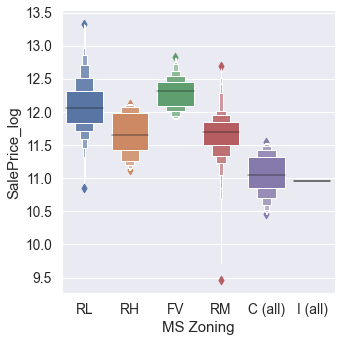

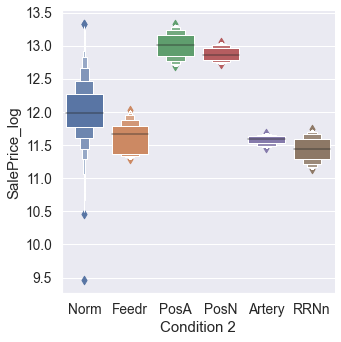

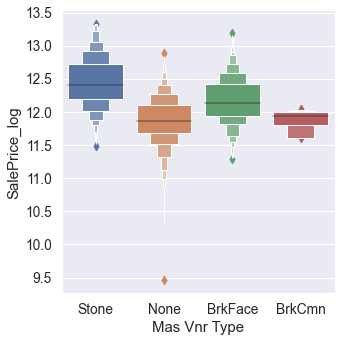

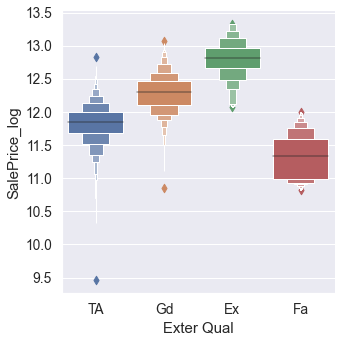

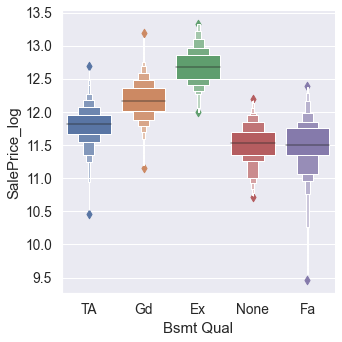

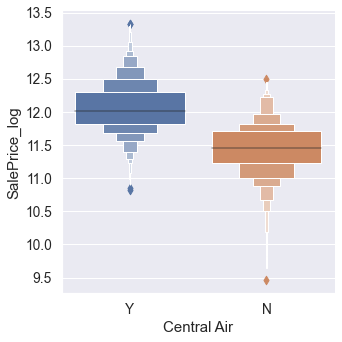

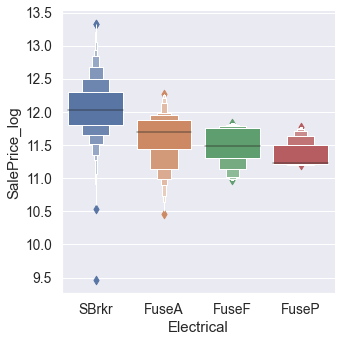

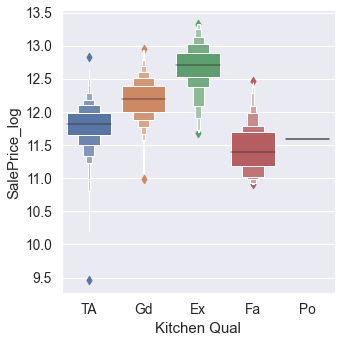

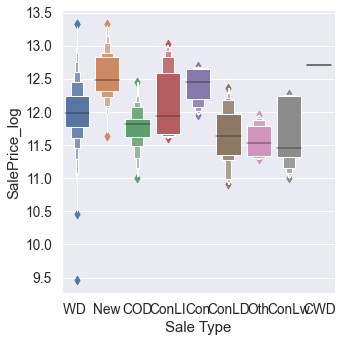

In [656]:
catg_list = catg_strong_corr.copy()
catg_list.remove('Neighborhood')

for catg in catg_list :
    sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    #sns.violinplot(x=catg, y=target, data=df_train)
    plt.show()
    #sns.boxenplot(x=catg, y=target, data=df_train)
    #bp = df_train.boxplot(column=[target], by=catg)

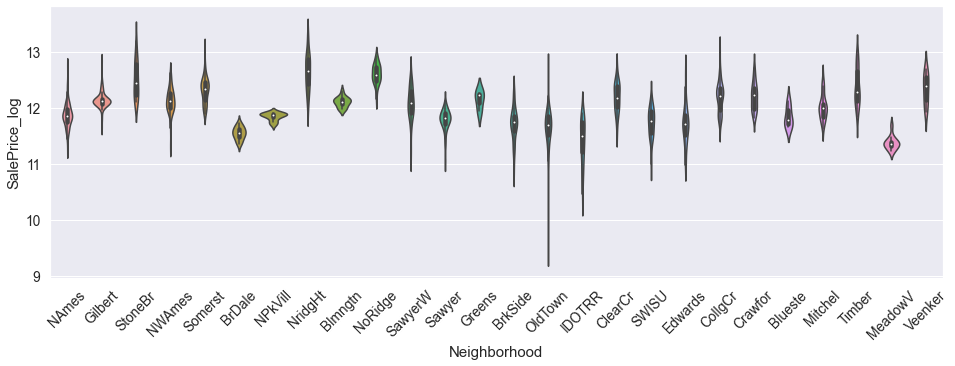

In [657]:
fig, ax = plt.subplots() # Neighborhood variable with target
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [658]:
catg_list.append('Neighborhood')
for catg in catg_list : # display mean of columns by target value ( par rapport à)
    g = df_train.groupby(catg)[target].mean()
    print(g)

MS Zoning
C (all)    11.057789
FV         12.287202
I (all)    10.961712
RH         11.691714
RL         12.082830
RM         11.658887
Name: SalePrice_log, dtype: float64
Condition 2
Artery    11.576653
Feedr     11.623605
Norm      12.017396
PosA      13.006397
PosN      12.878706
RRNn      11.435329
Name: SalePrice_log, dtype: float64
Mas Vnr Type
BrkCmn     11.870399
BrkFace    12.172924
None       11.872885
Stone      12.453669
Name: SalePrice_log, dtype: float64
Exter Qual
Ex    12.792419
Fa    11.341849
Gd    12.284644
TA    11.827665
Name: SalePrice_log, dtype: float64
Bsmt Qual
Ex      12.684539
Fa      11.489208
Gd      12.182198
None    11.528183
TA      11.798313
Name: SalePrice_log, dtype: float64
Central Air
N    11.424287
Y    12.057220
Name: SalePrice_log, dtype: float64
Electrical
FuseA    11.623016
FuseF    11.482231
FuseP    11.399583
SBrkr    12.052091
Name: SalePrice_log, dtype: float64
Kitchen Qual
Ex    12.688765
Fa    11.454553
Gd    12.194215
Po    11.585246
TA

In [659]:
df_train['MS Zoning'].value_counts(normalize=True)

RL         0.770279
RM         0.158146
FV         0.056578
RH         0.007498
C (all)    0.006817
I (all)    0.000682
Name: MS Zoning, dtype: float64

In [660]:
df_train['MS Zoning'].value_counts()

RL         1130
RM          232
FV           83
RH           11
C (all)      10
I (all)       1
Name: MS Zoning, dtype: int64

In [661]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

In [662]:
for df in [df_train, df_test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MS Zoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MS Zoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition 2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition 2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['Mas Vnr Type'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['Exter Qual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['Exter Qual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['Exter Qual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['Bsmt Qual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['Bsmt Qual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['Central Air'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['Kitchen Qual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['Kitchen Qual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['Kitchen Qual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['Sale Type'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['Sale Type'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['Sale Type'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  
  

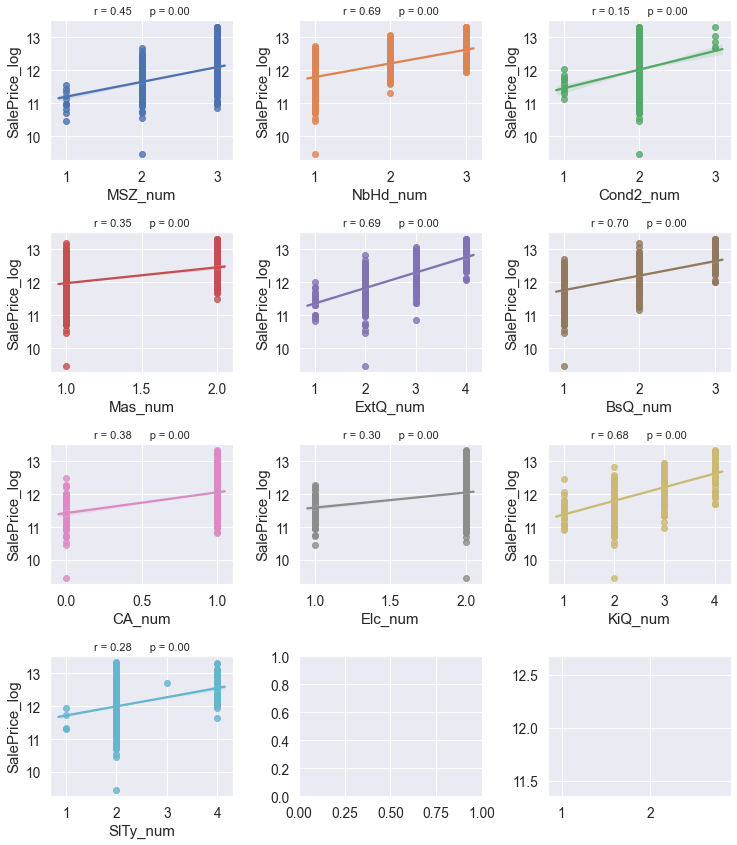

In [663]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(df_train[new_col_num[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

There are few columns with quite large correlation to SalePrice (NbHd_num, ExtQ_num, BsQ_num, KiQ_num).
These will probably be useful for optimal performance of the Regressors in part 3.

In [664]:
df_train

,MS Zoning,Neighborhood,Condition 2,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Type,Mas Vnr Area,Exter Qual,Bsmt Qual,BsmtFin SF 1,Total Bsmt SF,Central Air,Electrical,1st Flr SF,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Sale Type,SalePrice_log,GrLivArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
0,RL,NAmes,Norm,6,1960,1960,Stone,112.0,TA,TA,639.0,1080.0,Y,SBrkr,1656,1,TA,7,2,1960.0,2.0,528.0,WD,12.278393,7.412160,3,1,2,2,2,1,1,2,2,2
1,RH,NAmes,Norm,5,1961,1961,None,0.0,TA,TA,468.0,882.0,Y,SBrkr,896,1,TA,5,0,1961.0,1.0,730.0,WD,11.561716,6.797940,2,1,2,1,2,1,1,2,2,2
2,RL,NAmes,Norm,6,1958,1958,BrkFace,108.0,TA,TA,923.0,1329.0,Y,SBrkr,1329,1,Gd,6,0,1958.0,1.0,312.0,WD,12.055250,7.192182,3,1,2,1,2,1,1,2,3,2
3,RL,NAmes,Norm,7,1968,1968,None,0.0,Gd,TA,1065.0,2110.0,Y,SBrkr,2110,2,Ex,8,2,1968.0,2.0,522.0,WD,12.404924,7.654443,3,1,2,1,3,1,1,2,4,2
4,RL,Gilbert,Norm,5,1997,1998,None,0.0,TA,Gd,791.0,928.0,Y,SBrkr,928,2,TA,6,1,1997.0,2.0,482.0,WD,12.154253,7.395722,3,2,2,1,2,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,RL,CollgCr,Norm,8,2002,2002,None,0.0,Gd,Gd,0.0,1128.0,Y,SBrkr,1149,2,Gd,9,1,2002.0,2.0,779.0,WD,12.452542,7.736307,3,2,2,1,3,2,1,2,3,2
1463,RL,CollgCr,Norm,7,2003,2003,BrkFace,252.0,Gd,Gd,550.0,884.0,Y,SBrkr,884,2,Gd,8,0,2003.0,2.0,543.0,WD,12.323411,7.477604,3,2,2,1,3,2,1,2,3,2
1464,RL,CollgCr,Norm,7,2003,2003,None,0.0,Gd,Gd,0.0,1129.0,Y,SBrkr,1129,2,Gd,9,1,2003.0,2.0,596.0,WD,12.388394,7.752335,3,2,2,1,3,2,1,2,3,2
1465,RL,CollgCr,Norm,7,2003,2003,None,0.0,Gd,Gd,0.0,798.0,Y,SBrkr,798,2,Gd,6,0,2003.0,2.0,595.0,WD,12.117241,7.402452,3,2,2,1,3,2,1,2,3,2


### Dropping the converted categorical columns and the new numerical columns with weak correlation

### columns and correlation before dropping

In [665]:
catg_cols_to_drop = ['Neighborhood' , 'Condition 2', 'Mas Vnr Type', 'Exter Qual', 'Bsmt Qual','Central Air', 'Electrical', 'Kitchen Qual', 'Sale Type']


In [666]:
corr1 = df_train.corr() # corr ne s'applique que sur les variables discrètes
corr_abs_1 = corr1.abs()
corr1

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice_log,GrLivArea_Log,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
Overall Qual,1.000000,0.606755,0.567314,0.431354,0.324036,0.552924,0.488356,0.506796,0.361208,0.386370,0.557109,0.610378,0.582854,0.823850,0.585581,0.285848,0.664340,0.130779,0.341536,0.733671,0.696096,0.286053,0.268528,0.680338,0.266153
Year Built,0.606755,1.000000,0.578552,0.332943,0.316378,0.415815,0.327667,0.470296,0.120741,0.205245,0.798529,0.546090,0.508852,0.646107,0.289259,0.528150,0.629764,0.129703,0.282451,0.574646,0.729153,0.368587,0.313995,0.531945,0.242640
Year Remod/Add,0.567314,0.578552,1.000000,0.203927,0.174167,0.287875,0.244349,0.432137,0.190707,0.145855,0.613423,0.415564,0.383996,0.591388,0.333511,0.240979,0.508725,0.076924,0.240445,0.605456,0.589832,0.257466,0.312119,0.606069,0.236088
Mas Vnr Area,0.431354,0.332943,0.203927,1.000000,0.306712,0.404260,0.397920,0.238869,0.282023,0.263158,0.269205,0.370265,0.390561,0.454229,0.367730,0.159257,0.443064,0.087906,0.261251,0.369263,0.338176,0.141453,0.125125,0.325264,0.164381
BsmtFin SF 1,0.324036,0.316378,0.174167,0.306712,1.000000,0.527272,0.450273,0.071400,0.038615,0.323909,0.224272,0.280372,0.313287,0.471483,0.181181,0.252908,0.289033,0.115378,0.211289,0.275568,0.357070,0.188028,0.155469,0.313729,0.085365
Total Bsmt SF,0.552924,0.415815,0.287875,0.404260,0.527272,1.000000,0.813866,0.297488,0.243339,0.367846,0.338300,0.453747,0.482685,0.660441,0.413825,0.310539,0.482797,0.129036,0.307597,0.462208,0.490872,0.229195,0.163421,0.473139,0.208794
1st Flr SF,0.488356,0.327667,0.244349,0.397920,0.450273,0.813866,1.000000,0.339858,0.358352,0.430057,0.274076,0.441729,0.476543,0.624174,0.522211,0.322048,0.424501,0.136437,0.291805,0.403228,0.406655,0.165522,0.121848,0.420996,0.184002
Full Bath,0.506796,0.470296,0.432137,0.238869,0.071400,0.297488,0.339858,1.000000,0.518190,0.245058,0.502477,0.469263,0.404410,0.556455,0.638919,0.227547,0.472449,0.085245,0.179622,0.435552,0.484315,0.124459,0.169591,0.392446,0.143792
TotRms AbvGrd,0.361208,0.120741,0.190707,0.282023,0.038615,0.243339,0.358352,0.518190,1.000000,0.307226,0.155127,0.342974,0.296919,0.475211,0.796364,0.104572,0.291066,0.044935,0.145674,0.261558,0.222702,0.052132,0.072409,0.263785,0.076910
Fireplaces,0.386370,0.205245,0.145855,0.263158,0.323909,0.367846,0.430057,0.245058,0.307226,1.000000,0.114958,0.342856,0.303111,0.490529,0.462724,0.219032,0.318725,0.093064,0.184263,0.258518,0.269440,0.193740,0.104078,0.249346,0.066124


In [667]:
nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target] # concern only variables continuous
# correlation between all variables ( continous) and target , par rapport à la target

print(ser_corr_1)

SalePrice_log     1.000000
Overall Qual      0.823850
GrLivArea_Log     0.707638
BsQ_num           0.698875
NbHd_num          0.689100
ExtQ_num          0.688478
Garage Cars       0.684372
KiQ_num           0.680556
Garage Area       0.665509
Total Bsmt SF     0.660441
Year Built        0.646107
1st Flr SF        0.624174
Year Remod/Add    0.591388
Garage Yr Blt     0.569080
Full Bath         0.556455
Fireplaces        0.490529
TotRms AbvGrd     0.475211
BsmtFin SF 1      0.471483
Mas Vnr Area      0.454229
MSZ_num           0.446623
CA_num            0.380115
Mas_num           0.346723
Elc_num           0.300741
SlTy_num          0.278986
Cond2_num         0.154013
Name: SalePrice_log, dtype: float64


In [668]:
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index) 
cols_bel_corr_limit_1 # les variables inferior to threshold

['CA_num', 'Mas_num', 'Elc_num', 'SlTy_num', 'Cond2_num']

In [669]:
for df in [df_train, df_test] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)    

### columns and correlation after dropping



In [670]:
corr2 = df_train.corr()
corr_abs_2 = corr2.abs()

In [671]:
nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]
print(ser_corr_2)

SalePrice_log     1.000000
Overall Qual      0.823850
GrLivArea_Log     0.707638
BsQ_num           0.698875
NbHd_num          0.689100
ExtQ_num          0.688478
Garage Cars       0.684372
KiQ_num           0.680556
Garage Area       0.665509
Total Bsmt SF     0.660441
Year Built        0.646107
1st Flr SF        0.624174
Year Remod/Add    0.591388
Garage Yr Blt     0.569080
Full Bath         0.556455
Fireplaces        0.490529
TotRms AbvGrd     0.475211
BsmtFin SF 1      0.471483
Mas Vnr Area      0.454229
MSZ_num           0.446623
Name: SalePrice_log, dtype: float64


### new dataframes

In [677]:
df_train.head()

,MS Zoning,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,SalePrice_log,GrLivArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,6,1960,1960,112.0,639.0,1080.0,1656,1,7,2,1960.0,2.0,528.0,12.278393,7.412160,3,1,2,1,2
1,RH,5,1961,1961,0.0,468.0,882.0,896,1,5,0,1961.0,1.0,730.0,11.561716,6.797940,2,1,2,1,2
2,RL,6,1958,1958,108.0,923.0,1329.0,1329,1,6,0,1958.0,1.0,312.0,12.055250,7.192182,3,1,2,1,3
3,RL,7,1968,1968,0.0,1065.0,2110.0,2110,2,8,2,1968.0,2.0,522.0,12.404924,7.654443,3,1,3,1,4
4,RL,5,1997,1998,0.0,791.0,928.0,928,2,6,1,1997.0,2.0,482.0,12.154253,7.395722,3,2,2,2,2


In [673]:
df_test.head()

,MS Zoning,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,GrLivArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
1467,RL,7,1994,1995,0.0,642.0,915.0,933,2,8,1,1994.0,2.0,493.0,7.553811,3,2,3,2,3
1468,RM,6,2003,2003,170.0,686.0,848.0,848,1,3,0,2003.0,2.0,420.0,6.742881,2,2,3,2,3
1469,RM,6,2004,2004,205.0,662.0,848.0,848,1,3,0,2004.0,2.0,420.0,6.742881,2,2,3,2,3
1470,RL,6,1997,1998,215.0,994.0,1478.0,1493,2,7,1,1997.0,2.0,508.0,7.308543,3,2,2,2,3
1471,RM,6,1997,1998,0.0,1593.0,1838.0,1838,2,8,0,1998.0,3.0,721.0,7.516433,2,2,2,2,2


### List of all features with strong correlation to SalePrice_Log

after dropping all coumns with weak correlation

In [674]:
new_corr = df_train.corr()
corr_abs = new_corr.abs()

nr_all_cols = len(df_train)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice_log     1.000000
Overall Qual      0.823850
GrLivArea_Log     0.707638
BsQ_num           0.698875
NbHd_num          0.689100
ExtQ_num          0.688478
Garage Cars       0.684372
KiQ_num           0.680556
Garage Area       0.665509
Total Bsmt SF     0.660441
Year Built        0.646107
1st Flr SF        0.624174
Year Remod/Add    0.591388
Garage Yr Blt     0.569080
Full Bath         0.556455
Fireplaces        0.490529
TotRms AbvGrd     0.475211
BsmtFin SF 1      0.471483
Mas Vnr Area      0.454229
MSZ_num           0.446623
Name: SalePrice_log, dtype: float64


### Correlation Matrix 2 : All features with strong correlation to SalePrice


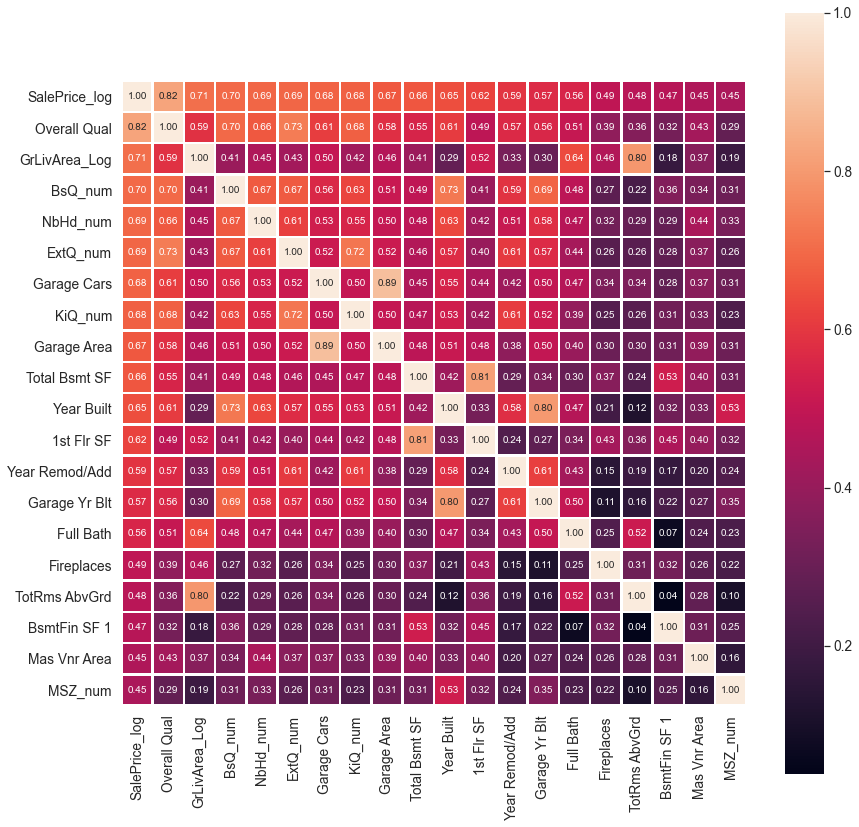

In [678]:
nr_feats=len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

### Check for Multicollinearity

Strong correlation of these features to other, similar features:

'GrLivArea_Log' and 'TotRmsAbvGrd'

'GarageCars' and 'GarageArea'

'TotalBsmtSF' and '1stFlrSF'

'YearBuilt' and 'GarageYrBlt'

### Of those features we drop the one that has smaller correlation coeffiecient to Target.

In [681]:
# delete variables with strong correlation with others than target
cols = corr_abs.nlargest(nr_all_cols, target)[target].index # recupérer les colonnes 
cols = list(cols)
cols

['SalePrice_log',
 'Overall Qual',
 'GrLivArea_Log',
 'BsQ_num',
 'NbHd_num',
 'ExtQ_num',
 'Garage Cars',
 'KiQ_num',
 'Garage Area',
 'Total Bsmt SF',
 'Year Built',
 '1st Flr SF',
 'Year Remod/Add',
 'Garage Yr Blt',
 'Full Bath',
 'Fireplaces',
 'TotRms AbvGrd',
 'BsmtFin SF 1',
 'Mas Vnr Area',
 'MSZ_num']

In [684]:
for col in ['Garage Area','1st Flr SF','Tot Rms Abv Grd','Garage Yr Blt'] :
        if col in cols: 
            cols.remove(col)

In [685]:
cols = list(cols)
print(cols)

['SalePrice_log', 'Overall Qual', 'GrLivArea_Log', 'BsQ_num', 'NbHd_num', 'ExtQ_num', 'Garage Cars', 'KiQ_num', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces', 'TotRms AbvGrd', 'BsmtFin SF 1', 'Mas Vnr Area', 'MSZ_num']


### List of features used for the Regressors in Part 3

In [689]:
feats = cols.copy()
feats.remove('SalePrice_log')

print(feats)

['Overall Qual', 'GrLivArea_Log', 'BsQ_num', 'NbHd_num', 'ExtQ_num', 'Garage Cars', 'KiQ_num', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'Fireplaces', 'TotRms AbvGrd', 'BsmtFin SF 1', 'Mas Vnr Area', 'MSZ_num']


In [690]:
df_train_ml = df_train[feats].copy()
df_test_ml  = df_test[feats].copy()

y = df_train[target]

In [691]:
df_train_ml

,Overall Qual,GrLivArea_Log,BsQ_num,NbHd_num,ExtQ_num,Garage Cars,KiQ_num,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Fireplaces,TotRms AbvGrd,BsmtFin SF 1,Mas Vnr Area,MSZ_num
0,6,7.412160,1,1,2,2.0,2,1080.0,1960,1960,1,2,7,639.0,112.0,3
1,5,6.797940,1,1,2,1.0,2,882.0,1961,1961,1,0,5,468.0,0.0,2
2,6,7.192182,1,1,2,1.0,3,1329.0,1958,1958,1,0,6,923.0,108.0,3
3,7,7.654443,1,1,3,2.0,4,2110.0,1968,1968,2,2,8,1065.0,0.0,3
4,5,7.395722,2,2,2,2.0,2,928.0,1997,1998,2,1,6,791.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,8,7.736307,2,2,3,2.0,3,1128.0,2002,2002,2,1,9,0.0,0.0,3
1463,7,7.477604,2,2,3,2.0,3,884.0,2003,2003,2,0,8,550.0,252.0,3
1464,7,7.752335,2,2,3,2.0,3,1129.0,2003,2003,2,1,9,0.0,0.0,3
1465,7,7.402452,2,2,3,2.0,3,798.0,2003,2003,2,0,6,0.0,0.0,3


In [692]:
df_test_ml

,Overall Qual,GrLivArea_Log,BsQ_num,NbHd_num,ExtQ_num,Garage Cars,KiQ_num,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Fireplaces,TotRms AbvGrd,BsmtFin SF 1,Mas Vnr Area,MSZ_num
1467,7,7.553811,2,2,3,2.0,3,915.0,1994,1995,2,1,8,642.0,0.0,3
1468,6,6.742881,2,2,3,2.0,3,848.0,2003,2003,1,0,3,686.0,170.0,2
1469,6,6.742881,2,2,3,2.0,3,848.0,2004,2004,1,0,3,662.0,205.0,2
1470,6,7.308543,2,2,2,2.0,3,1478.0,1997,1998,2,1,7,994.0,215.0,3
1471,6,7.516433,2,2,2,3.0,2,1838.0,1997,1998,2,0,8,1593.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,6.910751,1,1,2,2.0,2,1003.0,1984,1984,1,0,6,819.0,0.0,3
2926,5,6.804615,2,1,2,2.0,2,864.0,1983,1983,1,0,5,301.0,0.0,3
2927,5,6.877296,2,1,2,0.0,2,912.0,1992,1992,1,0,6,337.0,0.0,3
2928,5,7.236339,2,1,2,2.0,2,1389.0,1974,1975,1,1,6,1071.0,0.0,3


## StandardScaler

In [693]:
from sklearn.preprocessing import StandardScaler # N(0,1)

sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml) # return un numpy array
df_test_ml_sc = sc.transform(df_test_ml)

In [694]:
df_train_ml_sc

array([[-0.08218977,  0.48403275, -0.90686326, ...,  0.43029793,
         0.05361839,  0.44741816],
       [-0.79143915, -1.46842896, -0.90686326, ...,  0.04540515,
        -0.58934488, -2.02942123],
       [-0.08218977, -0.21522682, -0.90686326, ...,  1.06953506,
         0.03065541,  0.44741816],
       ...,
       [ 0.62705961,  1.56536911,  0.64368266, ..., -1.00798563,
        -0.58934488,  0.44741816],
       [ 0.62705961,  0.4531707 ,  0.64368266, ..., -1.00798563,
        -0.58934488,  0.44741816],
       [ 1.33630898,  0.68486373,  0.64368266, ..., -1.00798563,
         0.51287786,  0.44741816]])

In [695]:
df_test_ml_sc

array([[ 0.62705961,  0.93430667,  0.64368266, ...,  0.43705043,
        -0.58934488,  0.44741816],
       [-0.08218977, -1.64345114,  0.64368266, ...,  0.53608717,
         0.38658151, -2.02942123],
       [-0.08218977, -1.64345114,  0.64368266, ...,  0.48206713,
         0.58750753, -2.02942123],
       ...,
       [-0.79143915, -1.21617585,  0.64368266, ..., -0.24945424,
        -0.58934488,  0.44741816],
       [-0.79143915, -0.07486113,  0.64368266, ...,  1.40265864,
        -0.58934488,  0.44741816],
       [ 0.62705961,  1.0839999 ,  0.64368266, ...,  0.69814729,
        -0.049715  ,  0.44741816]])

In [696]:
df_train_ml_sc = pd.DataFrame(df_train_ml_sc) # convert numpy array to dataframe
df_train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.082190,0.484033,-0.906863,-0.794533,-0.683666,0.305042,-0.790422,0.073996,-0.366955,-1.188048,-1.041564,2.171790,0.376154,0.430298,0.053618,0.447418
1,-0.791439,-1.468429,-0.906863,-0.794533,-0.683666,-1.026794,-0.790422,-0.389117,-0.334018,-1.139974,-1.041564,-0.921429,-0.911635,0.045405,-0.589345,-2.029421
2,-0.082190,-0.215227,-0.906863,-0.794533,-0.683666,-1.026794,0.707704,0.656396,-0.432829,-1.284196,-1.041564,-0.921429,-0.267741,1.069535,0.030655,0.447418
3,0.627060,1.254193,-0.906863,-0.794533,0.985115,0.305042,2.205830,2.483119,-0.103459,-0.803458,0.792739,2.171790,1.020048,1.389154,-0.589345,0.447418
4,-0.791439,0.431778,0.643683,0.686509,-0.683666,0.305042,-0.790422,-0.281525,0.851716,0.638755,0.792739,0.625180,-0.267741,0.772425,-0.589345,0.447418


## Creating Datasets for ML algorithms

In [697]:
X = df_train_ml.copy()
y = df_train[target]
X_test = df_test_ml.copy()

#X.info()
#X_test.info()

In [698]:
X_sc = df_train_ml_sc.copy()
y_sc = df_train[target]
X_test_sc = df_test_ml_sc.copy()

In [700]:
X.head()

,Overall Qual,GrLivArea_Log,BsQ_num,NbHd_num,ExtQ_num,Garage Cars,KiQ_num,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Fireplaces,TotRms AbvGrd,BsmtFin SF 1,Mas Vnr Area,MSZ_num
0,6,7.412160,1,1,2,2.0,2,1080.0,1960,1960,1,2,7,639.0,112.0,3
1,5,6.797940,1,1,2,1.0,2,882.0,1961,1961,1,0,5,468.0,0.0,2
2,6,7.192182,1,1,2,1.0,3,1329.0,1958,1958,1,0,6,923.0,108.0,3
3,7,7.654443,1,1,3,2.0,4,2110.0,1968,1968,2,2,8,1065.0,0.0,3
4,5,7.395722,2,2,2,2.0,2,928.0,1997,1998,2,1,6,791.0,0.0,3


In [701]:
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.082190,0.484033,-0.906863,-0.794533,-0.683666,0.305042,-0.790422,0.073996,-0.366955,-1.188048,-1.041564,2.171790,0.376154,0.430298,0.053618,0.447418
1,-0.791439,-1.468429,-0.906863,-0.794533,-0.683666,-1.026794,-0.790422,-0.389117,-0.334018,-1.139974,-1.041564,-0.921429,-0.911635,0.045405,-0.589345,-2.029421
2,-0.082190,-0.215227,-0.906863,-0.794533,-0.683666,-1.026794,0.707704,0.656396,-0.432829,-1.284196,-1.041564,-0.921429,-0.267741,1.069535,0.030655,0.447418
3,0.627060,1.254193,-0.906863,-0.794533,0.985115,0.305042,2.205830,2.483119,-0.103459,-0.803458,0.792739,2.171790,1.020048,1.389154,-0.589345,0.447418
4,-0.791439,0.431778,0.643683,0.686509,-0.683666,0.305042,-0.790422,-0.281525,0.851716,0.638755,0.792739,0.625180,-0.267741,0.772425,-0.589345,0.447418


In [702]:
X_test.head()

,Overall Qual,GrLivArea_Log,BsQ_num,NbHd_num,ExtQ_num,Garage Cars,KiQ_num,Total Bsmt SF,Year Built,Year Remod/Add,Full Bath,Fireplaces,TotRms AbvGrd,BsmtFin SF 1,Mas Vnr Area,MSZ_num
1467,7,7.553811,2,2,3,2.0,3,915.0,1994,1995,2,1,8,642.0,0.0,3
1468,6,6.742881,2,2,3,2.0,3,848.0,2003,2003,1,0,3,686.0,170.0,2
1469,6,6.742881,2,2,3,2.0,3,848.0,2004,2004,1,0,3,662.0,205.0,2
1470,6,7.308543,2,2,2,2.0,3,1478.0,1997,1998,2,1,7,994.0,215.0,3
1471,6,7.516433,2,2,2,3.0,2,1838.0,1997,1998,2,0,8,1593.0,0.0,2


# Part 3: Scikit-learn basic regression models and comparison of results

## Test simple sklearn models and compare by metrics

### We test the following Regressors from scikit-learn:

LinearRegression

Ridge

Lasso

Elastic Net

Stochastic Gradient Descent

DecisionTreeRegressor

RandomForestRegressor

SVR